# 1.4.12 Template Matching

## Template Matching in OpenCV

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [3]:
resource_path = os.getcwd() + '/resource/'

In [9]:
img_gray_mode = cv2.imread(resource_path + 'hmson2.png', 0)
img_rgb = cv2.imread(resource_path + 'hmson2.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

In [10]:
cv2.imshow('img_gray_mode', img_gray_mode)
cv2.imshow('img_gray', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
diff = cv2.bitwise_xor(img_gray, img_gray_mode)

In [14]:
print(diff)

[[  0 253  26 ...  28  28   0]
 [  0 255  27 ...  31  29   0]
 [  0 255  28 ...  29  28   0]
 ...
 [  0 254  28 ...   0   3   0]
 [  0 254  28 ...   3   3   0]
 [  0 254  28 ...   3   3   0]]


In [16]:
cv2.imshow('diff', diff)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
img = cv2.imread(resource_path + 'hmson2.png', 0)
img2 = img.copy()
template = cv2.imread(resource_path + 'template.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

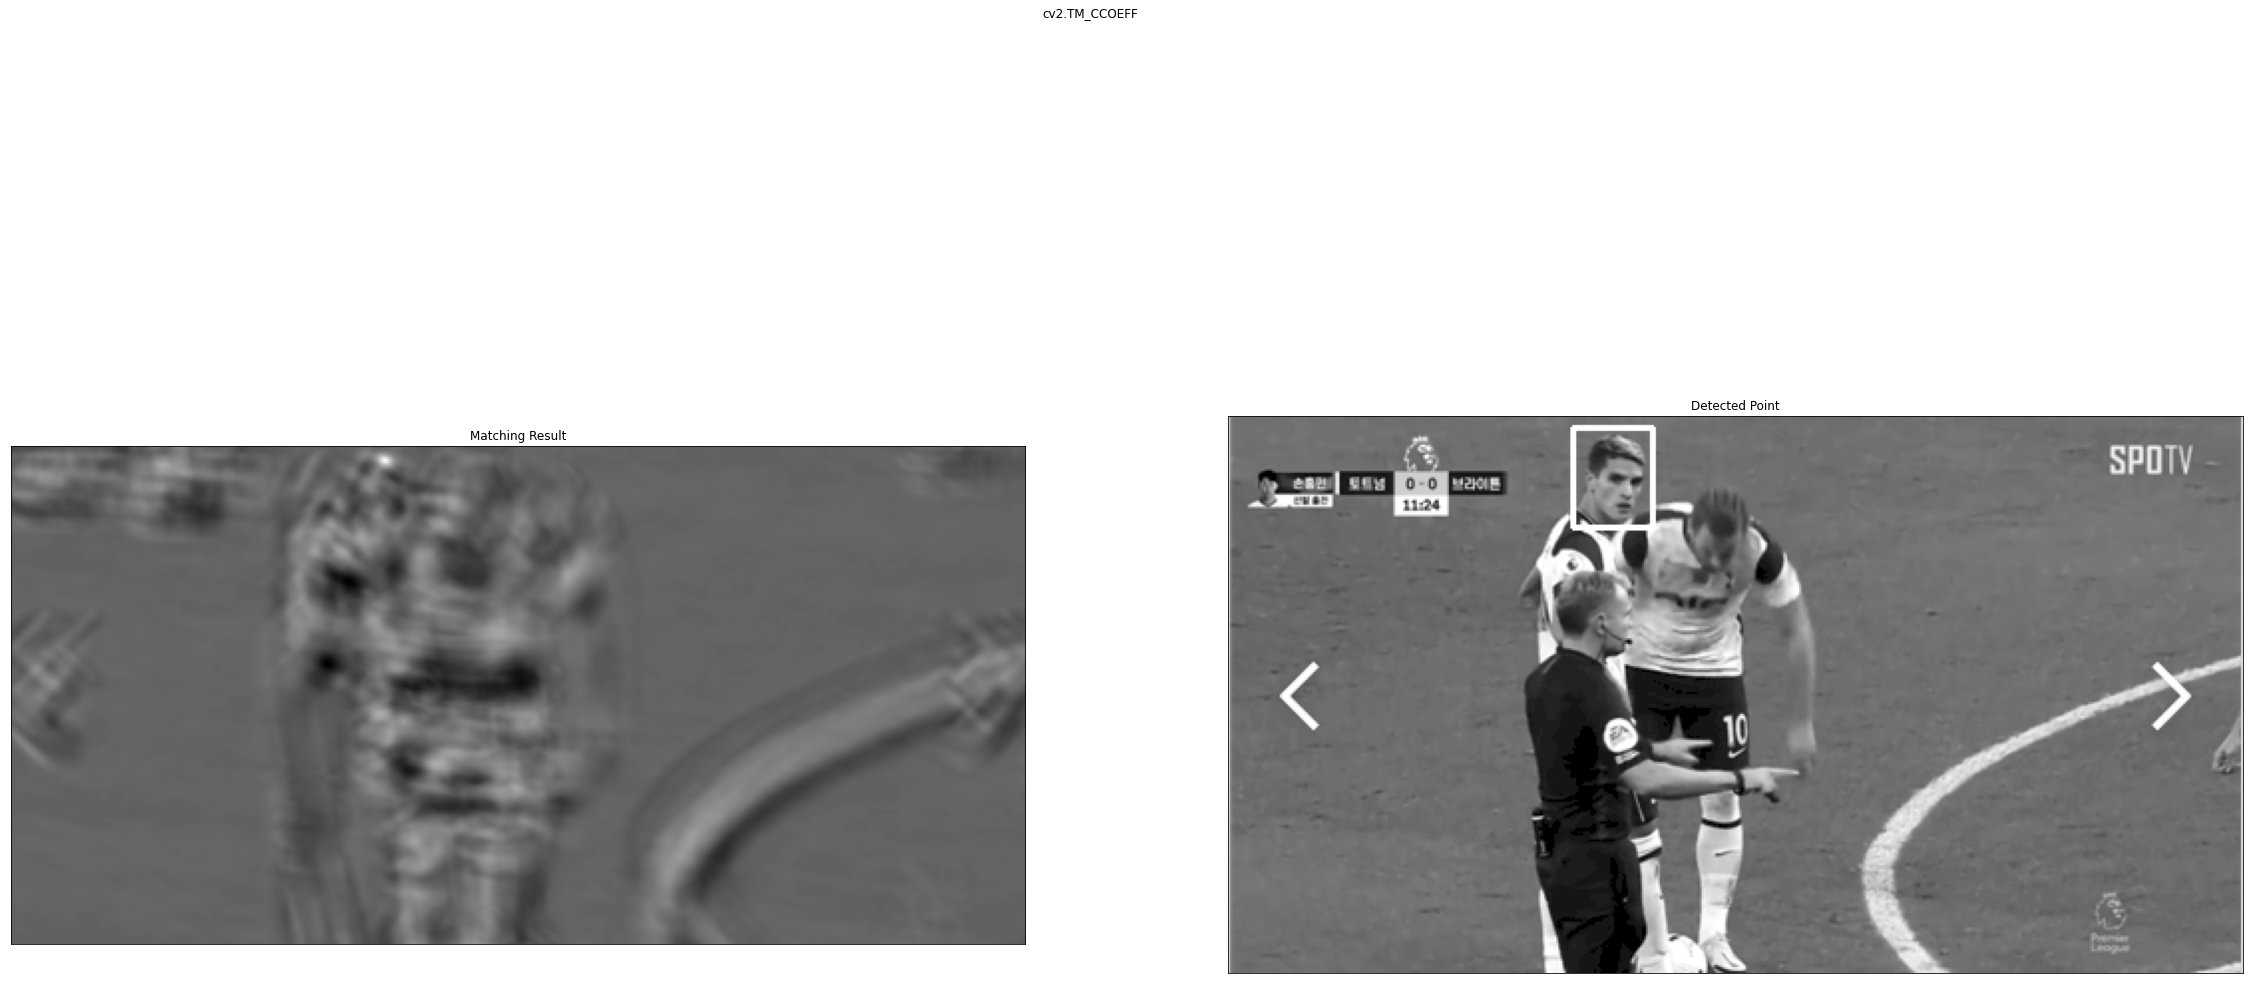

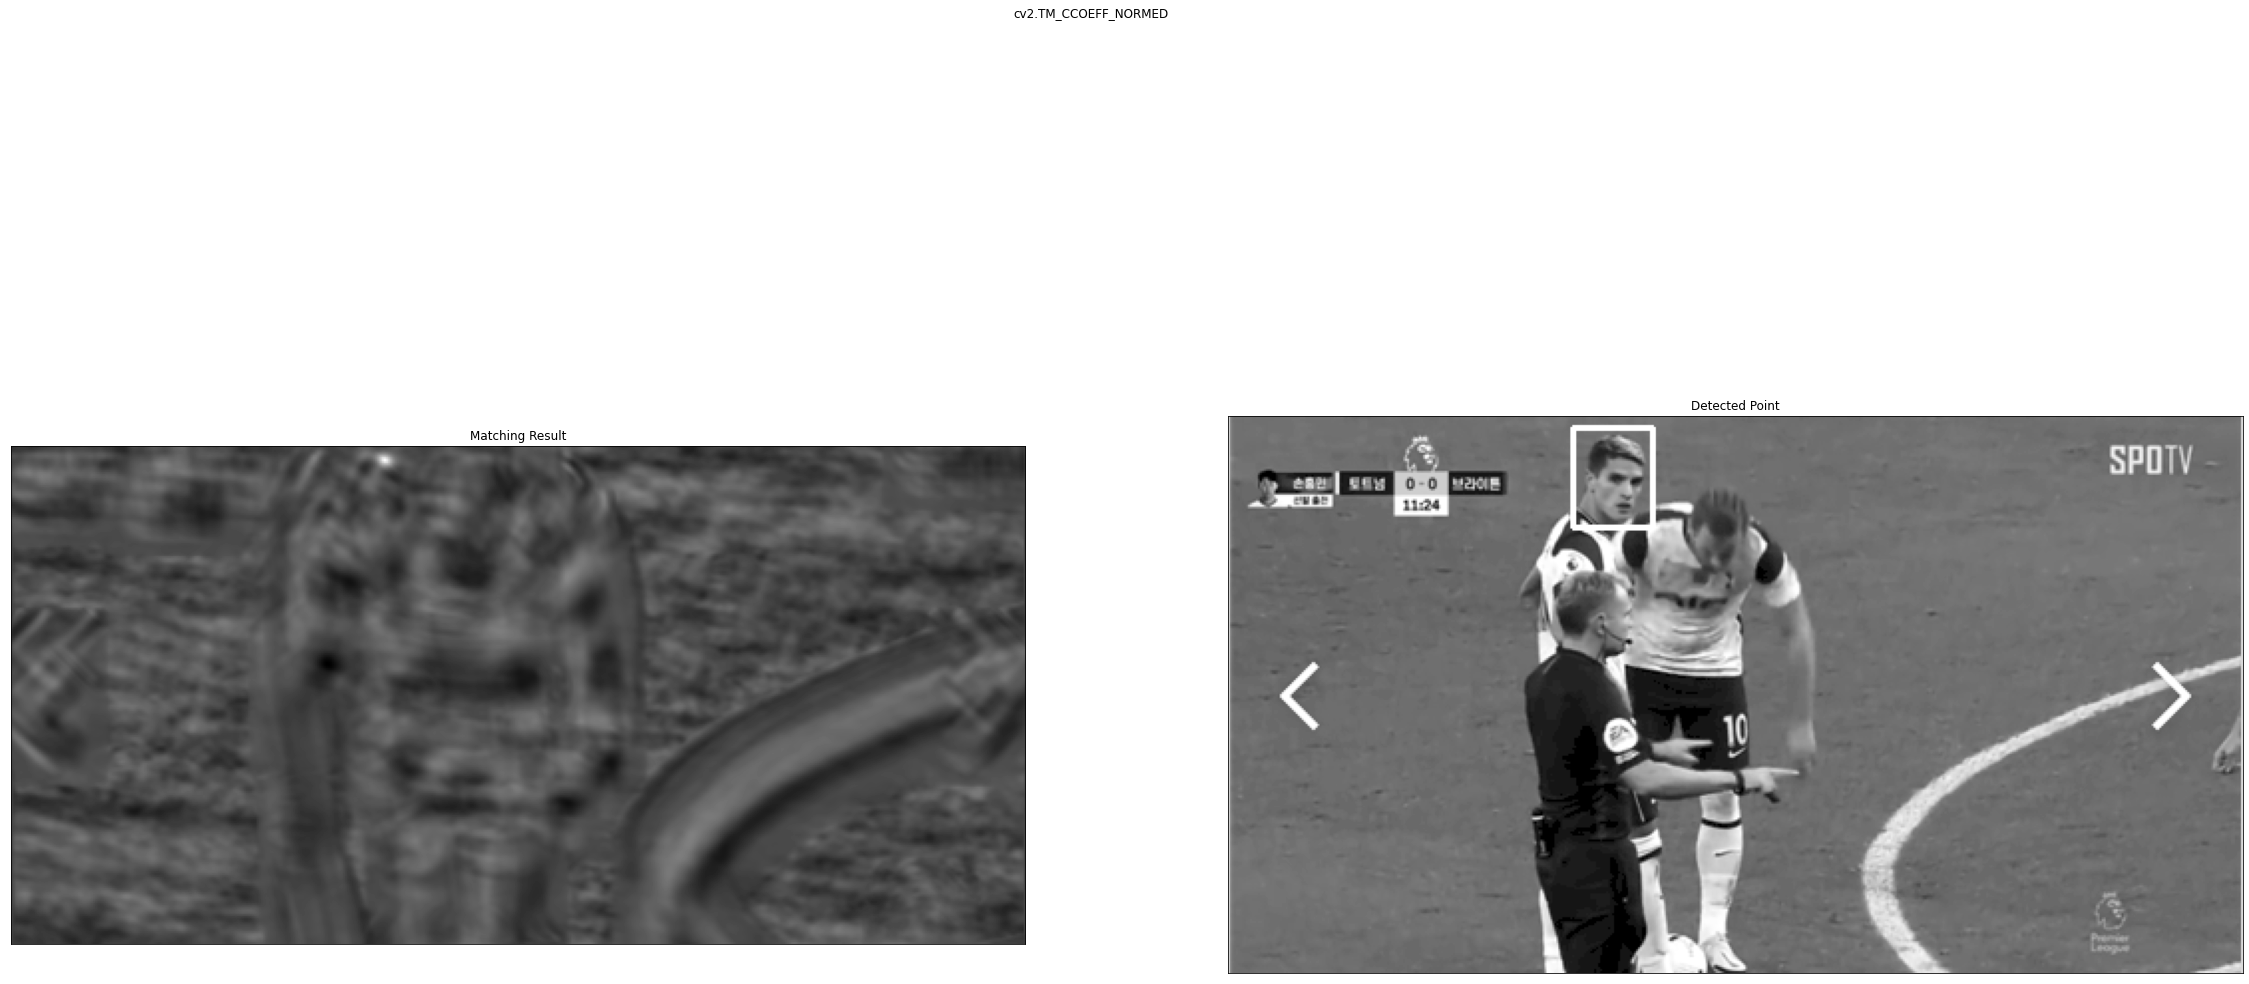

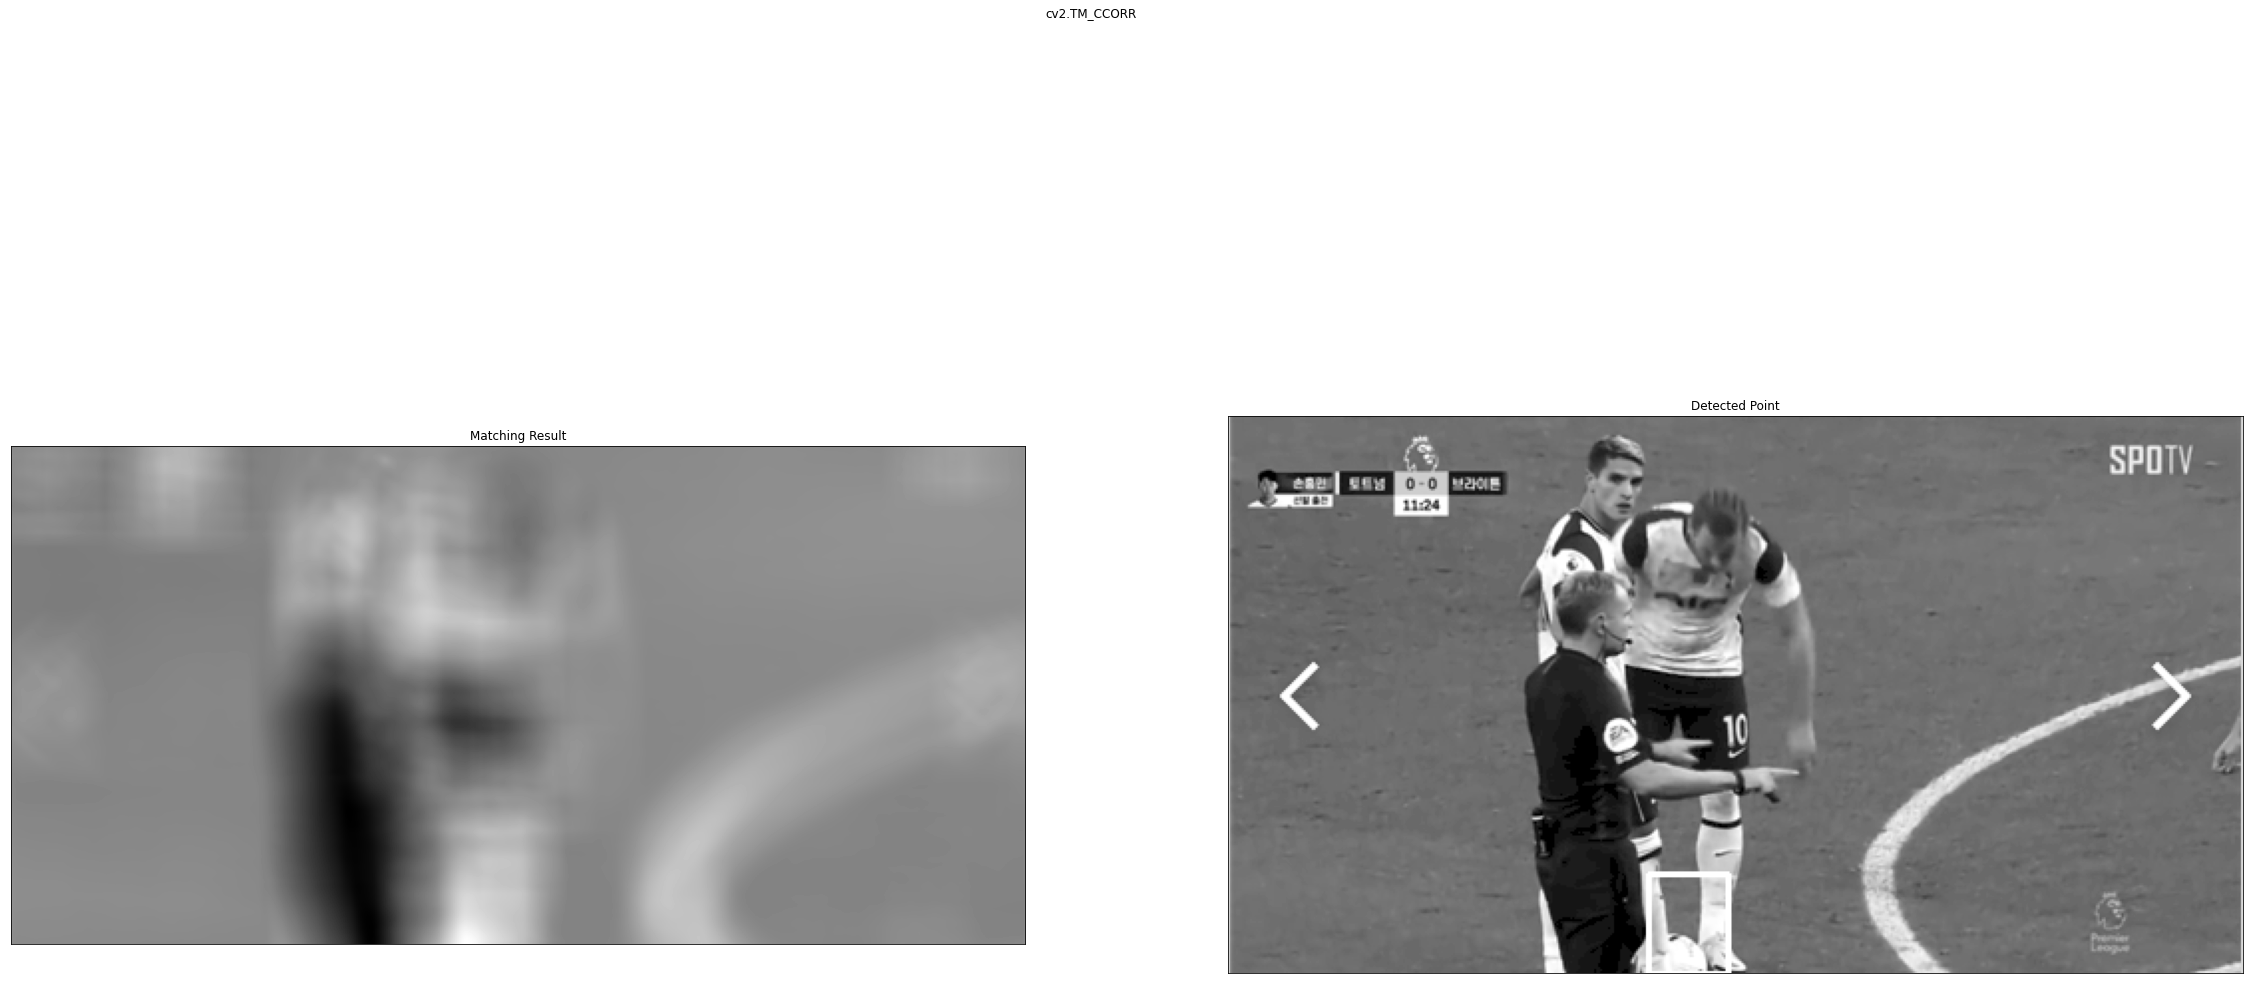

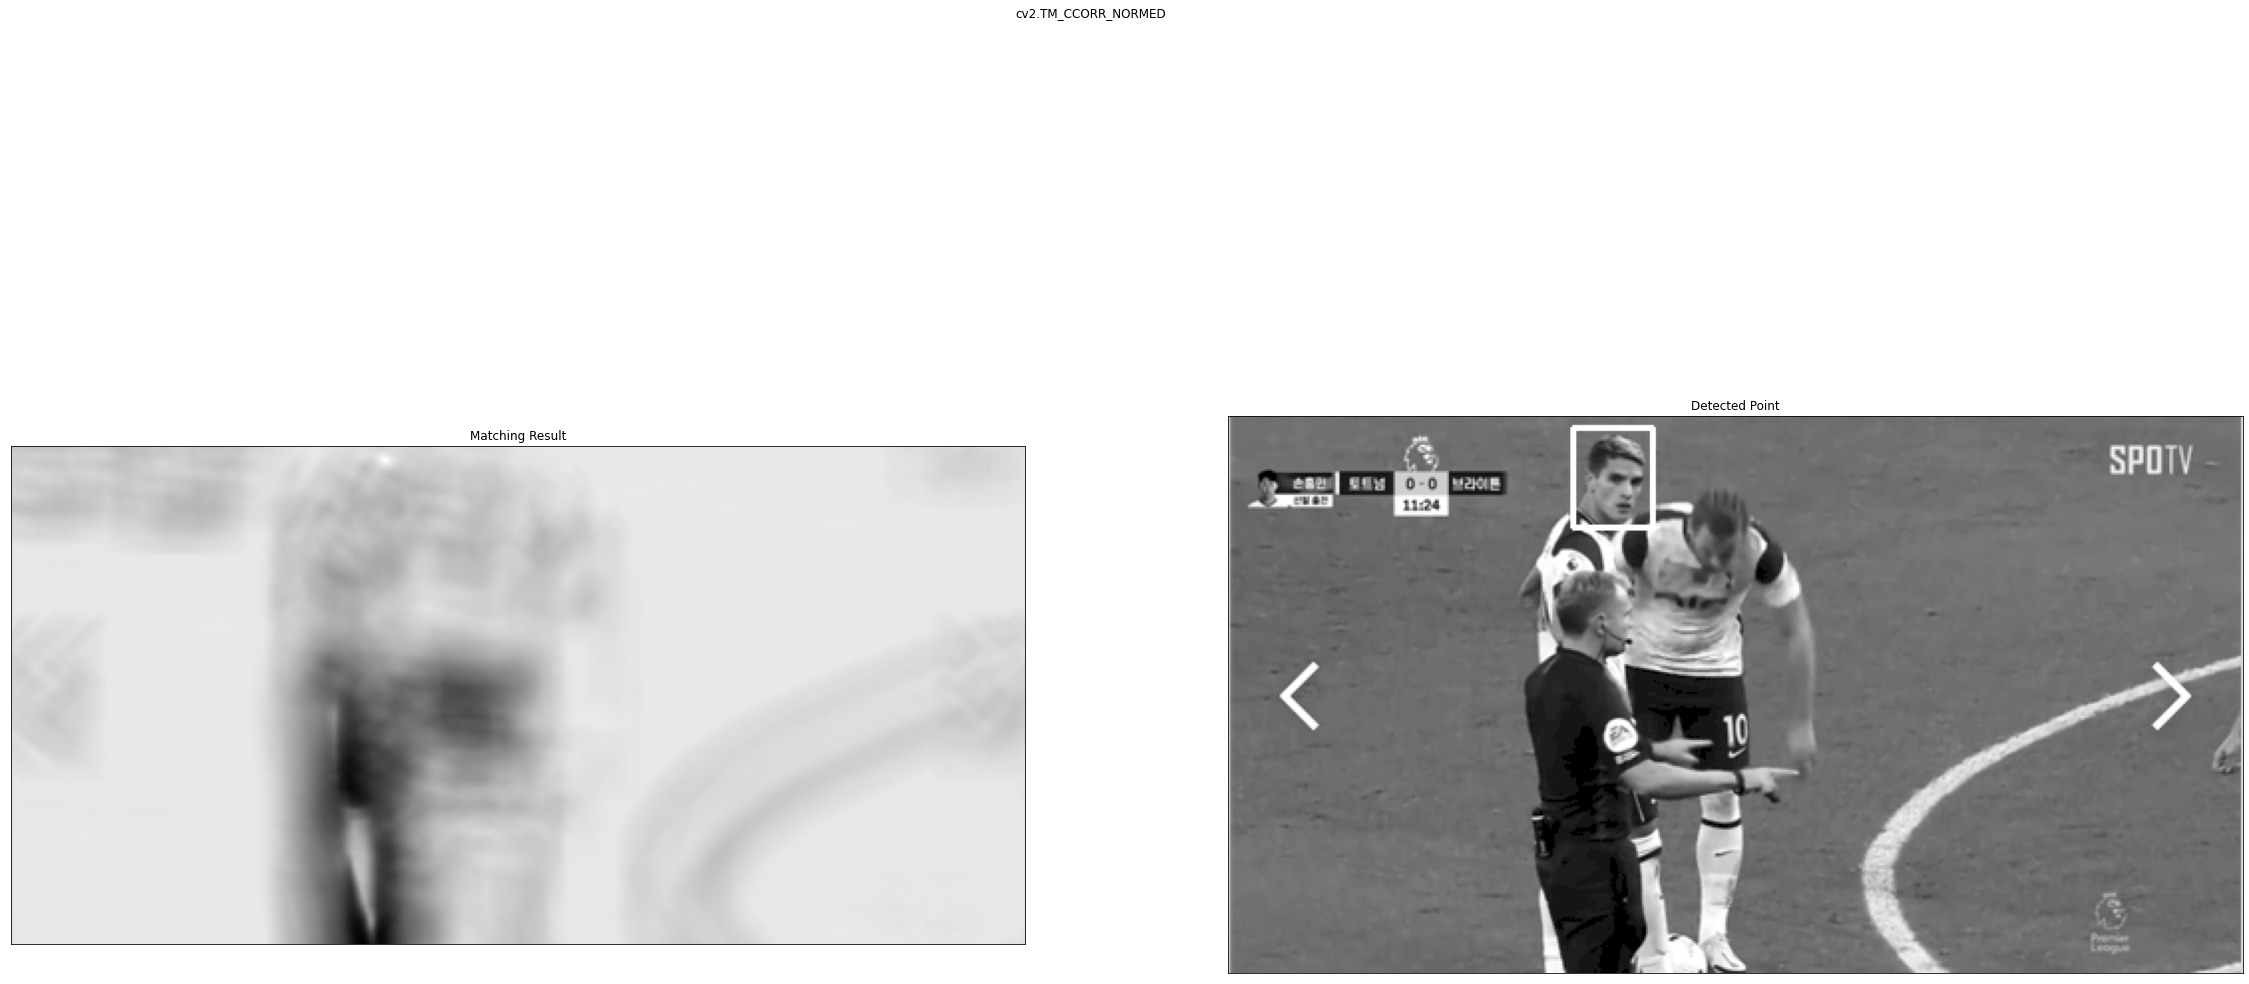

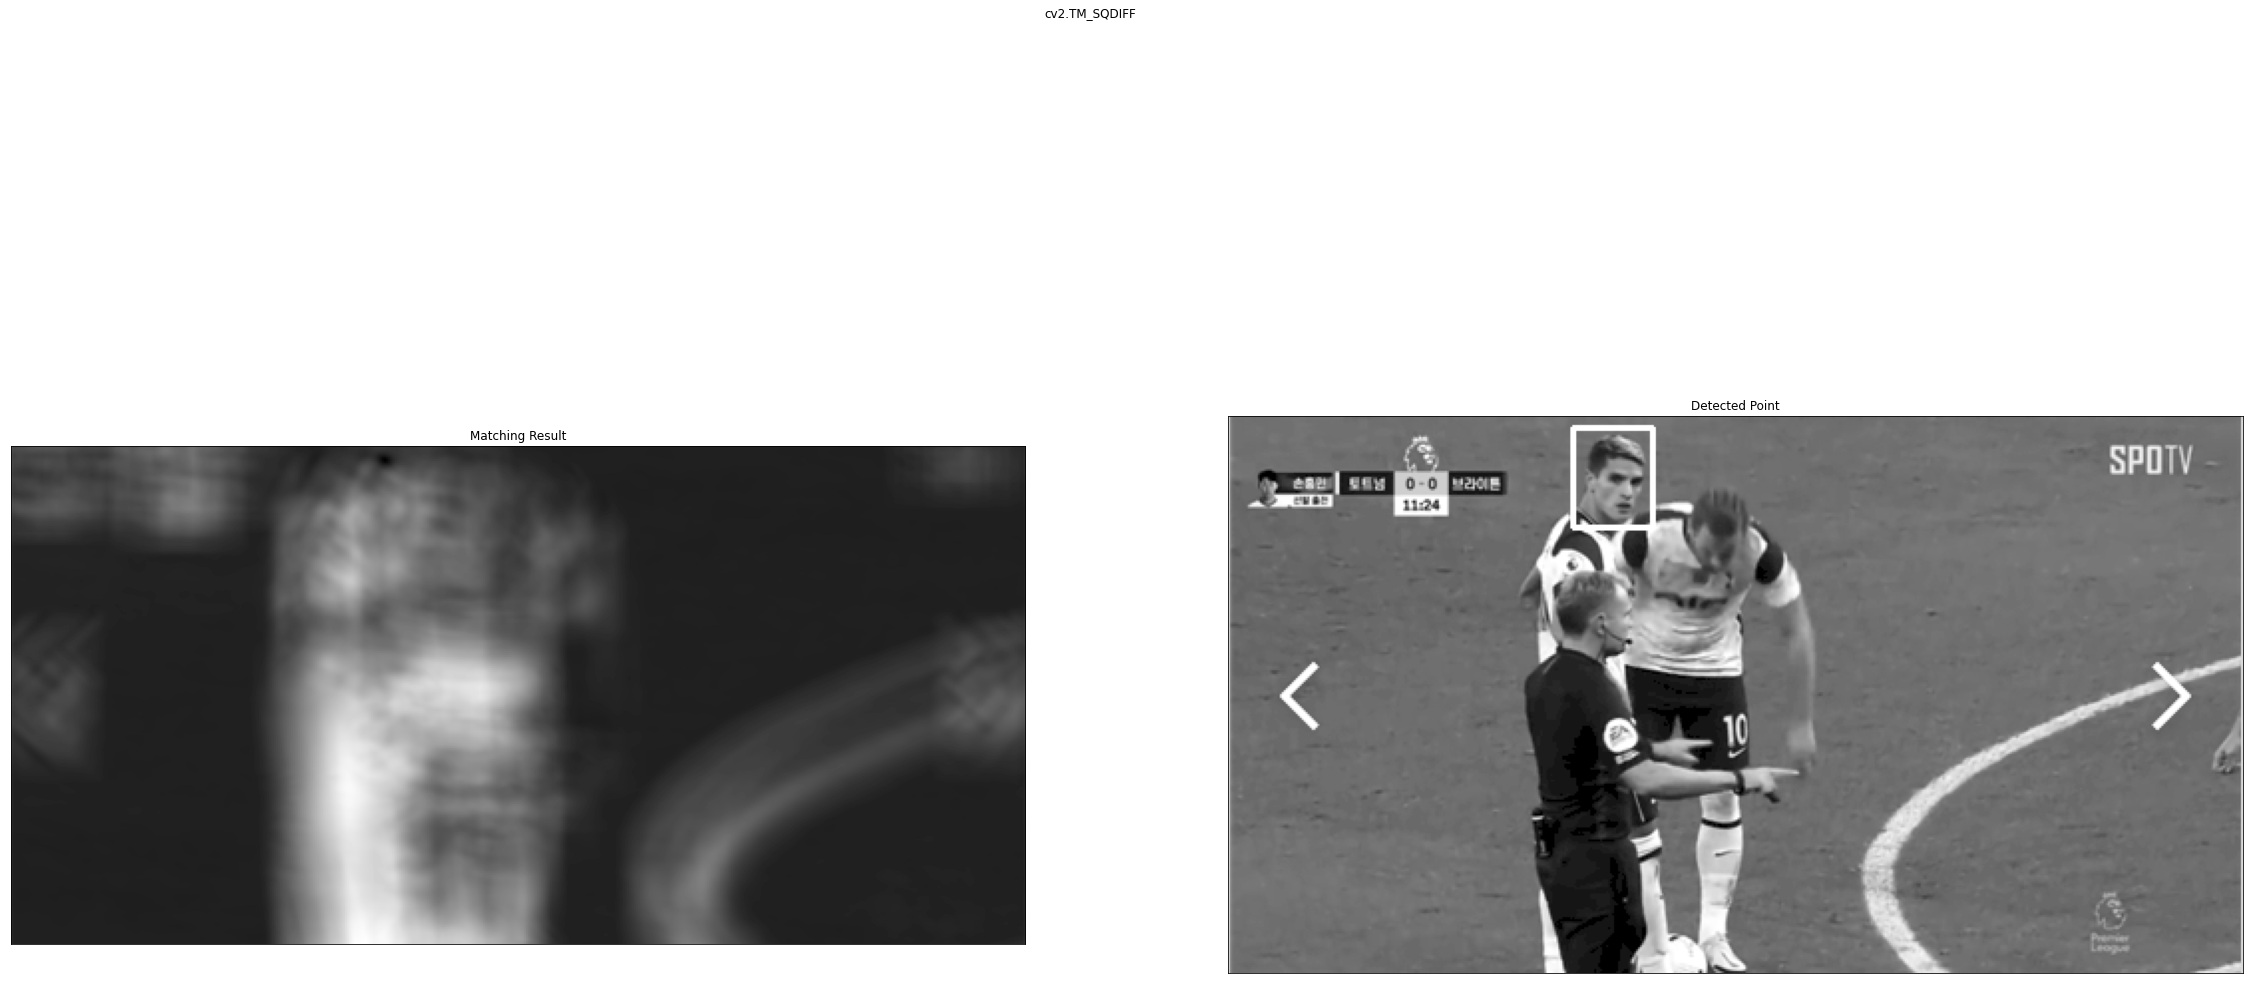

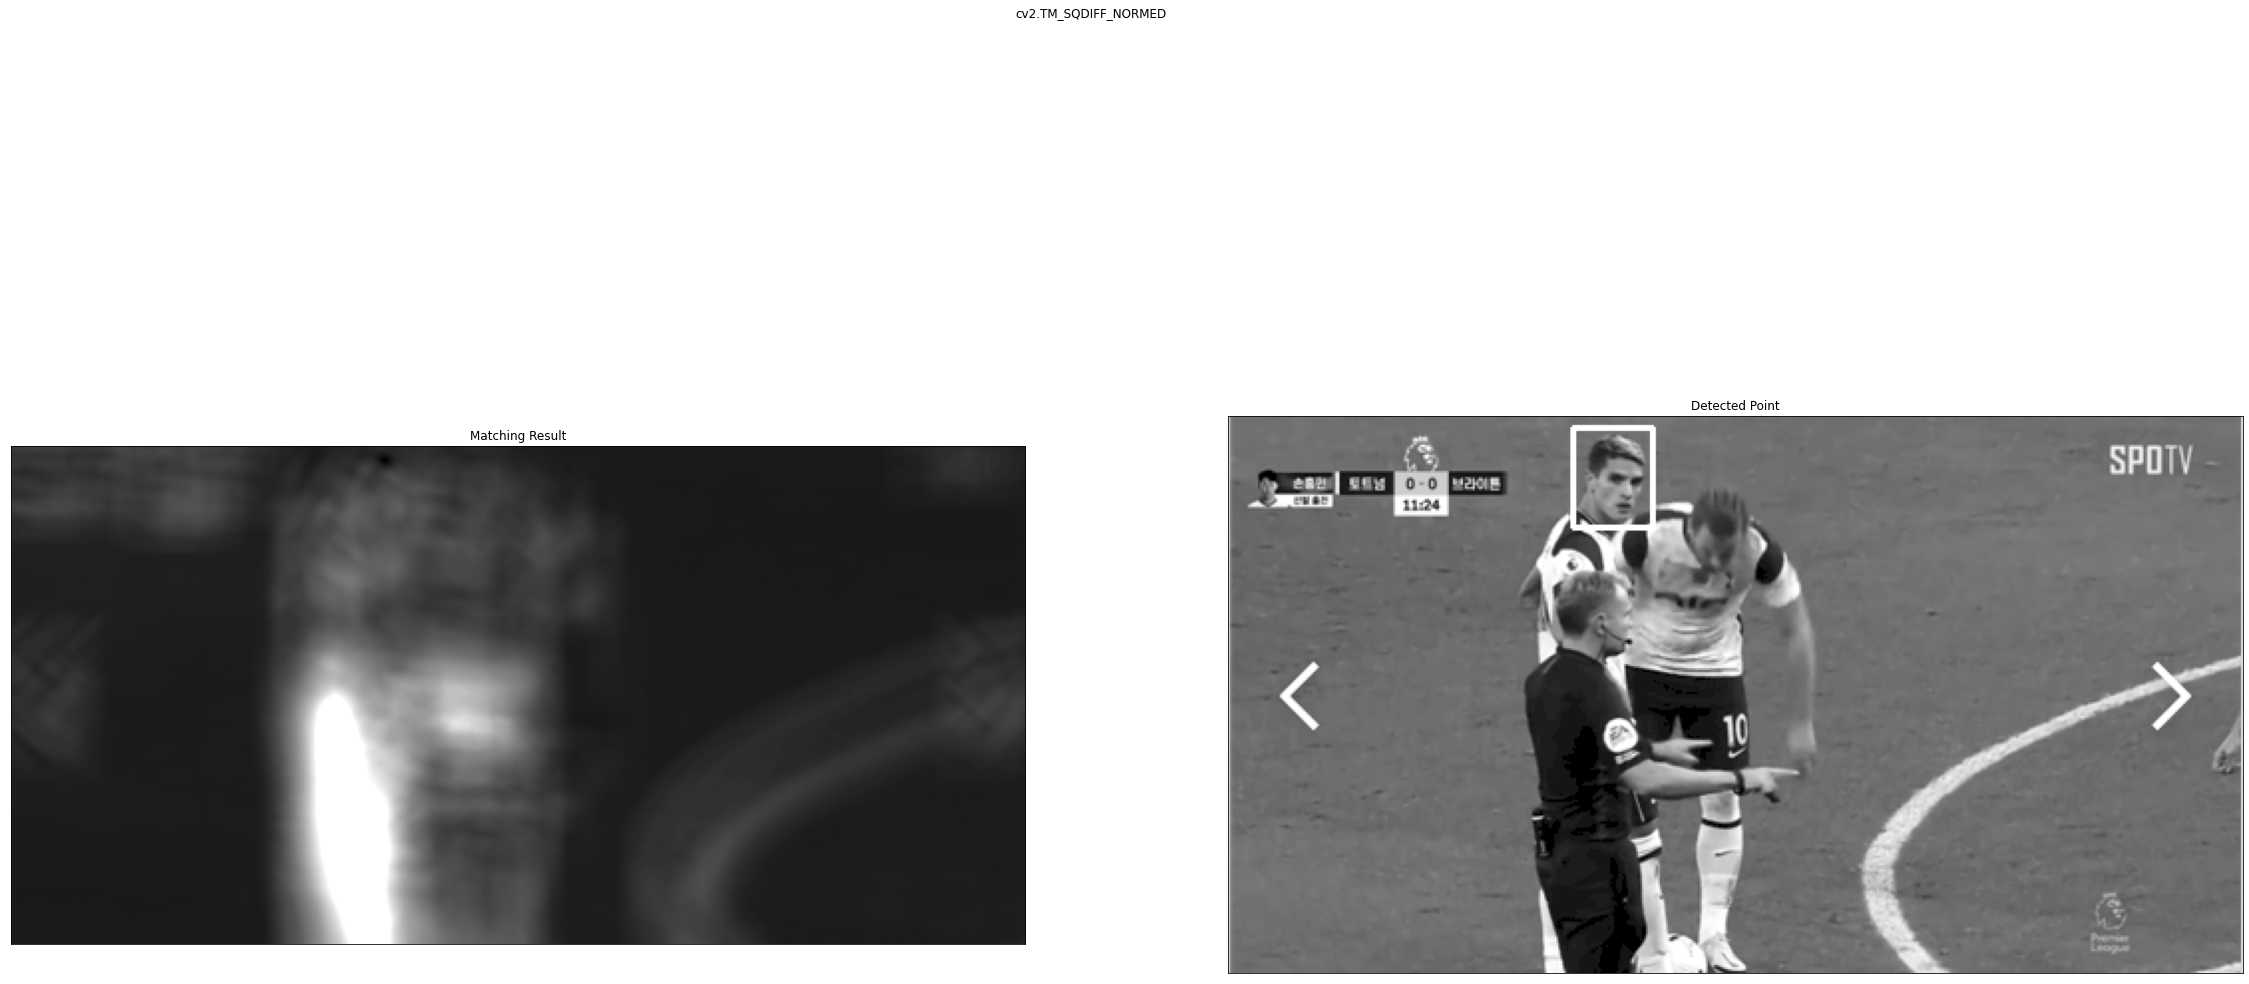

In [20]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    plt.figure(figsize=(40, 20))
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

## Template Matching with Multiple Objects

In [21]:
# img_rgb = cv2.imread(resource_path + 'mario.png')
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.imread(resource_path + 'mario.png')
img_gray = cv2.imread(resource_path + 'mario.png', 0)

In [35]:
cv2.imshow('dst', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
template = cv2.imread(resource_path + 'coin.png',0)

In [37]:
cv2.imshow('dst', template)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
w, h = template.shape[::-1]
print(w, h)

12 20


In [39]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
print(res)

[[-0.2761548   0.          0.         ... -0.18399985 -0.10510887
  -0.04244996]
 [-0.27615482  0.          0.         ... -0.16813762 -0.09791335
  -0.04121347]
 [-0.2761549   0.          0.         ... -0.22648846 -0.16722754
  -0.12163652]
 ...
 [-0.27534395 -0.12040603 -0.08587626 ... -0.34747848 -0.15910879
  -0.17765087]
 [-0.19372922  0.04428029  0.07770166 ... -0.07319777  0.13124464
   0.16684467]
 [-0.18924634  0.05014695  0.08442415 ...  0.19512503  0.37395224
   0.431806  ]]


In [41]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

0.0 1.0 (239, 234) (91, 98)


In [42]:
res = (res-min_val)/(max_val-min_val)
print(res)

[[0.19885077 0.3722163  0.3722163  ... 0.25670415 0.30623066 0.34556693]
 [0.19885074 0.3722163  0.3722163  ... 0.2666622  0.3107479  0.3463432 ]
 [0.19885069 0.3722163  0.3722163  ... 0.23003048 0.26723355 0.29585487]
 ...
 [0.19935979 0.29662734 0.3183046  ... 0.15407488 0.27233037 0.26068994]
 [0.25059623 0.4000148  0.42099622 ... 0.32626393 0.45460963 0.47695875]
 [0.2534105  0.4036978  0.42521647 ... 0.4947127  0.6069776  0.64329726]]


In [43]:
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
threshold = 0.8
loc = np.where( res >= threshold)

In [45]:
print(loc[::-1])

(array([ 90,  91,  92, 108, 109, 125, 126, 127, 143, 144, 160, 161, 162,
        90,  91,  92, 108, 109, 110, 125, 126, 127, 142, 143, 144, 145,
       160, 161, 162,  90,  91,  92, 108, 109, 125, 126, 127, 143, 144,
       160, 161, 162,  73,  74,  75,  90,  91,  92, 108, 109, 125, 126,
       127, 143, 144, 160, 161, 162, 177, 178, 179,  73,  74,  75,  90,
        91,  92, 108, 109, 110, 125, 126, 127, 142, 143, 144, 145, 160,
       161, 162, 177, 178, 179,  73,  74,  91,  92, 108, 109, 125, 126,
       127, 143, 144, 160, 161, 178, 179,  91, 126, 161, 178,  73,  74,
        90,  91,  92, 108, 109, 125, 126, 127, 143, 144, 160, 161, 178,
       179,  73,  74,  90,  91,  92, 108, 109, 125, 126, 127, 143, 144,
       160, 161, 178, 179,  74,  91, 108, 126, 143, 161, 178], dtype=int64), array([ 97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97,
        98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98,
        98,  98,  98,  99,  99,  99,  99,  99,  99,  99,  

In [46]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 4)

In [48]:
cv2.imshow('dst', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
cv2.imwrite('res.png', img_rgb)

True

In [50]:
def nothing(x):
    pass

In [53]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 200, 255, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    loc = np.where(res >= threshold / 255.)
    img_rgb = cv2.imread(resource_path + 'mario.png')
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)
    cv2.imshow('image', img_rgb)
cv2.destroyAllWindows()